In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download prajwalnayakat/text-emotion

Dataset URL: https://www.kaggle.com/datasets/prajwalnayakat/text-emotion
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.24M [00:00<?, ?B/s]
100% 4.24M/4.24M [00:00<00:00, 1.60GB/s]


In [2]:
import zipfile
zip = zipfile.ZipFile('/content/text-emotion.zip' , 'r')
zip.extractall('/content')
zip.close()

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/final_dataset.csv")

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.shape

(80826, 2)

In [7]:
def clean_words(x):
  return len(x.split(" "))

data["words"] = data['text'].apply(clean_words)

In [8]:
data

,text,emotion,words
0,i feel rather funny ending with so many dupes ...,fun,14
1,i feel surprised by the result,surprise,6
2,i am officially feeling festive,neutral,5
3,i suddenly found myself standing before this w...,surprise,48
4,i look at the meager pile of food i purchased ...,enthusiasm,18
...,...,...,...
106341,Why can't I see WHITE SOX players @ random bar...,fun,17
106343,i feeling resentful even though i am happy for...,happiness,11
106345,i know that this is also part of the learning ...,hate,55
106347,My family from NC just unexpectedly arrived at...,surprise,10


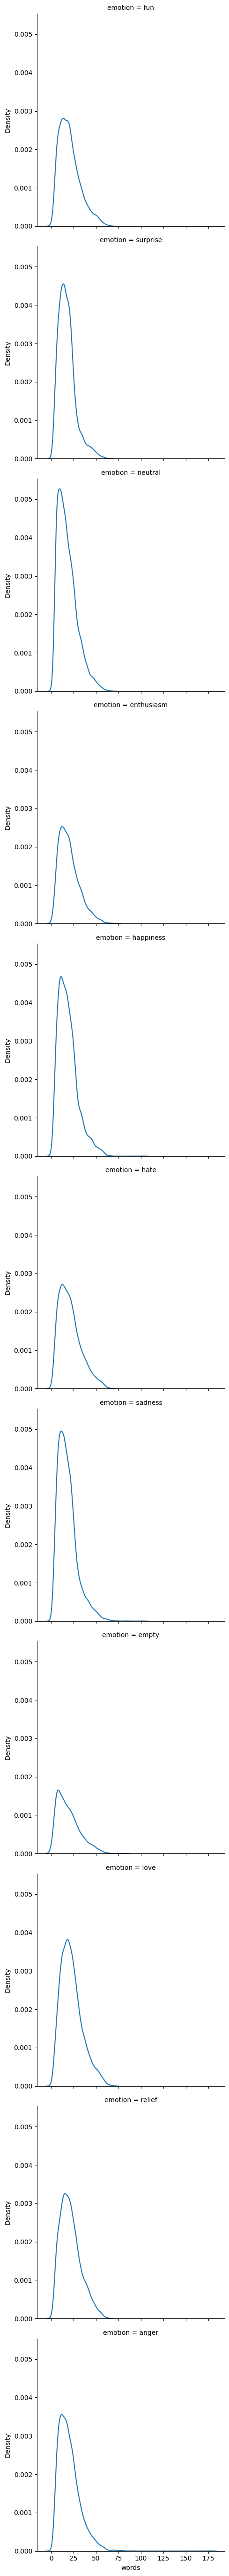

In [9]:
import seaborn as sns
sns.displot(data = data , x = "words" , row = "emotion" , kind = "kde")

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stem = PorterStemmer()

s = set(stopwords.words("english"))

import string

punc = string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def clean(x):
  x = x.lower()
  x = x.split(" ")
  r = []
  for i in x:
    if i not in s:
      r.append(stem.stem(i))
  r = " ".join(r)
  re = ""
  for i in r:
    if i not in punc:
      re = re + i


  return re


data["t"] = data["text"].apply(clean)

In [12]:
data.drop(["text" , "words"] , axis = 1, inplace = True)

In [13]:
data

,emotion,t
0,fun,feel rather funni end mani dupe alway prefer o...
1,surprise,feel surpris result
2,neutral,offici feel festiv
3,surprise,suddenli found stand woman dress like priestes...
4,enthusiasm,look meager pile food purchas week feel pretti...
...,...,...
106341,fun,cant see white sox player random bar go to cu...
106343,happiness,feel resent even though happi friend
106345,hate,know also part learn experi go set come end da...
106347,surprise,famili nc unexpectedli arriv house


In [14]:
data.drop_duplicates(inplace = True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = data["t"]
y = data['emotion']
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.30)

In [17]:
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape

((55857,), (55857,), (23939,), (23939,))

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
l = LabelEncoder()
l.fit(ytrain)

LabelEncoder()

In [20]:
ytr = l.transform(ytrain)
yte = l.transform(ytest)

In [21]:
ytr , ytrain

(array([ 8, 10,  7, ...,  7,  6,  5]),
 77998      relief
 72227    surprise
 90754     neutral
 25467      relief
 41960       anger
            ...   
 85475     sadness
 54656       empty
 46553     neutral
 38623        love
 63902        hate
 Name: emotion, Length: 55857, dtype: object)

In [22]:
# Anger : 0
# Empty : 1
# enthusiasm : 2
# fun : 3
# happiness: 4
# hate : 5
# love : 6
# neutral : 7
# relief : 8
# sadness : 9
# surprise: 10

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [24]:
t = Tokenizer()

In [25]:
t.fit_on_texts(xtrain)

In [26]:
xtr = t.texts_to_sequences(xtrain)
xte = t.texts_to_sequences(xtest)

In [27]:
xtr_pad = pad_sequences(xtr , padding = "post" , maxlen = 50)
xte_pad = pad_sequences(xte , padding = "post" , maxlen = 50)

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , SimpleRNN , Flatten , LSTM , GRU , Bidirectional , Embedding

In [33]:
model = Sequential()
model.add(Embedding(29814 , output_dim = 128))
model.add(Bidirectional(LSTM(128 , return_sequences = True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(11 , activation="softmax"))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"] ,
              optimizer = "adam")

In [36]:
model.fit(xtr_pad , ytr , epochs = 20 , validation_data = (xte_pad , yte) , batch_size = 64)

Epoch 1/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5263 - loss: 1.4100 - val_accuracy: 0.7950 - val_loss: 0.6445
Epoch 2/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8441 - loss: 0.5055 - val_accuracy: 0.7978 - val_loss: 0.6297
Epoch 3/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8978 - loss: 0.3334 - val_accuracy: 0.7937 - val_loss: 0.7033
Epoch 4/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9271 - loss: 0.2413 - val_accuracy: 0.7920 - val_loss: 0.7567
Epoch 5/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9444 - loss: 0.1829 - val_accuracy: 0.7955 - val_loss: 0.8449
Epoch 6/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9563 - loss: 0.1384 - val_accuracy: 0.7878 - val_loss: 0.9414
Epoch 7/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9638 - loss: 0.1139 - val_accuracy: 0.7882 - val_loss: 1.0278
Epoch 8/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9682 - loss: 0.0991 - 

## Step 1: Install Required Libraries

Before you start coding, make sure you have all the necessary libraries installed in your VS Code Python environment. You can do this by opening your terminal in VS Code and running the following commands:

In [43]:
!pip install streamlit tensorflow pandas numpy nltk scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.9 MB/s eta 0:00:00
^C


## Step 2: Create Your Streamlit App Script

Now, create a new Python file in your VS Code workspace (e.g., `app.py`) and paste the following code into it. This script will:

1.  Load your saved Keras model (`emotion_model.h5`).
2.  Load the `LabelEncoder` (`l`) and `Tokenizer` (`t`) objects from your Colab session (you will need to serialize these and transfer them to your VS Code environment).
3.  Define the same text cleaning function used during training.
4.  Create a Streamlit interface to input text.
5.  Preprocess the input text.
6.  Make a prediction using the loaded model.
7.  Display the predicted emotion.

In [ ]:
# This cell is to demonstrate the content of 'app.py' file.
# You should create a file named 'app.py' in your VS Code and paste this code there.

import streamlit as st
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import string
import pickle

# Download NLTK data if not already present
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# --- Load the Model and Preprocessing Objects ---

# 1. Load the Keras model
# Assuming emotion_model.h5 is in the same directory as app.py
model = tf.keras.models.load_model('emotion_model.h5')

# 2. Load the LabelEncoder and Tokenizer
# IMPORTANT: You need to save your 'l' (LabelEncoder) and 't' (Tokenizer)
# objects from your Colab notebook and transfer them to your VS Code environment.
# For example, in Colab, you can run:
# import pickle
# with open('label_encoder.pkl', 'wb') as f: pickle.dump(l, f)
# with open('tokenizer.pkl', 'wb') as f: pickle.dump(t, f)
# Then download these .pkl files and place them next to app.py

try:
    with open('label_encoder.pkl', 'rb') as f:
        l = pickle.load(f)
    with open('tokenizer.pkl', 'rb') as f:
        t = pickle.load(f)
except FileNotFoundError:
    st.error("Error: 'label_encoder.pkl' or 'tokenizer.pkl' not found. Please save and download them from Colab.")
    st.stop()

# --- Text Cleaning Function (must be identical to training) ---
stem = PorterStemmer()
s = set(stopwords.words("english"))
punc = string.punctuation

def clean(text):
    text = text.lower()
    text = text.split(" ")
    r = []
    for i in text:
        if i not in s:
            r.append(stem.stem(i))
    r = " ".join(r)
    re = ""
    for i in r:
        if i not in punc:
            re = re + i
    return re

# --- Streamlit UI ---
st.title("Text Emotion Classifier")
st.write("Enter a sentence below to predict its emotion.")

user_input = st.text_area("Your Text:", "I am feeling very happy today!")

if st.button("Predict Emotion"):
    if user_input:
        # Preprocess input text
        cleaned_text = clean(user_input)

        # Convert text to sequence using the loaded tokenizer
        seq = t.texts_to_sequences([cleaned_text])

        # Pad the sequence (maxlen must be identical to training)
        padded_seq = pad_sequences(seq, padding="post", maxlen=50)

        # Make prediction
        prediction = model.predict(padded_seq)
        predicted_class_index = np.argmax(prediction, axis=1)[0]

        # Inverse transform to get the emotion label
        predicted_emotion = l.inverse_transform([predicted_class_index])[0]

        st.success(f"Predicted Emotion: **{predicted_emotion}**")
    else:
        st.warning("Please enter some text to predict.")


## Step 3: Save Preprocessing Objects from Colab

For the `app.py` script to work, it needs access to the `LabelEncoder` (`l`) and `Tokenizer` (`t`) objects that were fitted during your Colab session. You need to save these objects to files and then download them to your VS Code workspace, placing them in the same directory as `app.py`. Run the following code in your Colab notebook to save them:

In [ ]:
import pickle
from google.colab import files

# Save LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(l, f)
files.download('label_encoder.pkl')

# Save Tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(t, f)
files.download('tokenizer.pkl')

print("LabelEncoder and Tokenizer saved and downloaded as 'label_encoder.pkl' and 'tokenizer.pkl'.")

## Step 4: Run Your Streamlit App in VS Code

Once you have `app.py`, `emotion_model.h5`, `label_encoder.pkl`, and `tokenizer.pkl` all in the same directory in your VS Code workspace, open your VS Code terminal (Terminal > New Terminal) and navigate to that directory. Then, run the following command:

In [ ]:
# This command should be run in your VS Code terminal, not in Colab.
# !streamlit run app.py

This command will launch your Streamlit application in your web browser, usually at `http://localhost:8501`. You can then interact with your emotion classifier!

In [44]:
import pickle

# Save Tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(t, f)

print("Tokenizer saved as 'tokenizer.pkl'.")

Tokenizer saved as 'tokenizer.pkl'.


In [38]:
model.save('emotion_model.h5')
print("Model saved as 'emotion_model.h5'")

Model saved as 'emotion_model.h5'


In [39]:
from google.colab import files
files.download('emotion_model.h5')
print("Model 'emotion_model.h5' downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 'emotion_model.h5' downloaded.


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model.predict(xte_pad)
predicted_classes = np.argmax(predictions, axis=1)

# Inverse transform the predicted and true labels for readability
predicted_emotions = l.inverse_transform(predicted_classes)
true_emotions = l.inverse_transform(yte)

# Display classification report
print("Classification Report:")
print(classification_report(true_emotions, predicted_emotions))

# Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(true_emotions, predicted_emotions)
print(conf_matrix)

749/749 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.78      0.79      0.79      2124
       empty       0.77      0.77      0.77      1066
  enthusiasm       0.86      0.84      0.85      1640
         fun       0.71      0.76      0.73      1838
   happiness       0.72      0.68      0.70      2742
        hate       0.85      0.86      0.86      1755
        love       0.90      0.89      0.89      2507
     neutral       0.90      0.92      0.91      2948
      relief       0.89      0.88      0.88      2177
     sadness       0.65      0.61      0.63      2796
    surprise       0.61      0.64      0.62      2346

    accuracy                           0.78     23939
   macro avg       0.79      0.79      0.79     23939
weighted avg       0.78      0.78      0.78     23939


Confusion Matrix:
[[1685   18    9   26   63   40   13   56   13  124   77]
 [  25  823    5   23   27   19    6    8    9

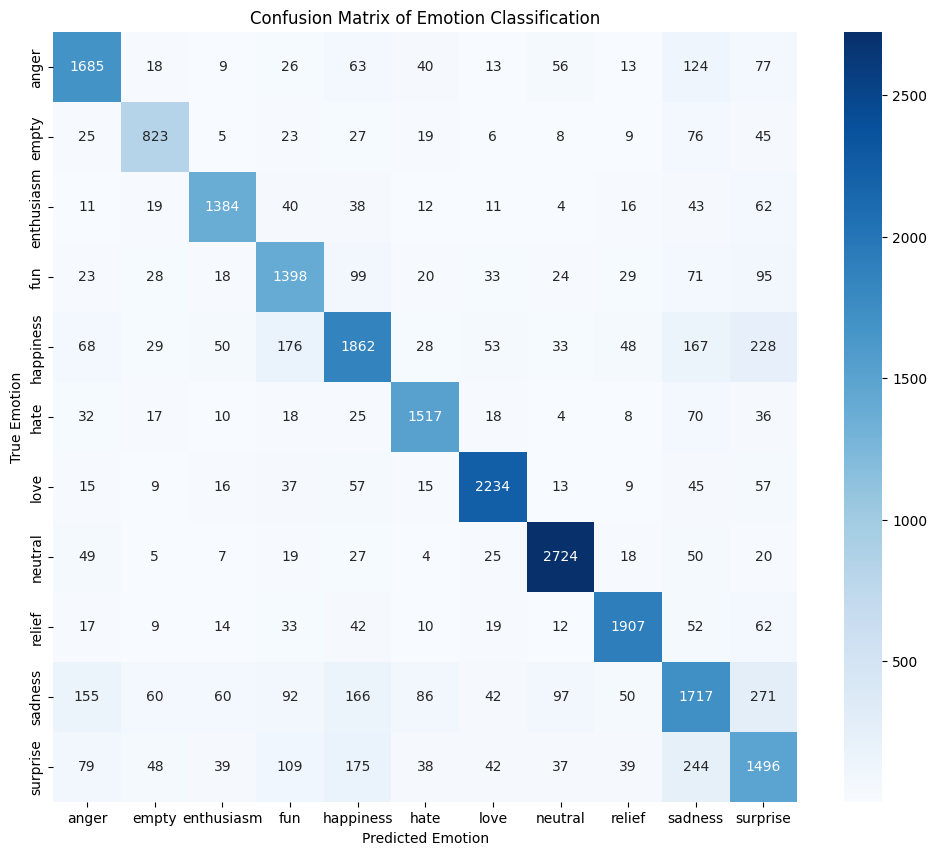

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the emotion labels from the LabelEncoder
emotion_labels = l.classes_

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix of Emotion Classification')
plt.show()

In [41]:
test_loss, test_accuracy = model.evaluate(xte_pad, yte)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

749/749 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7820 - loss: 1.7563
Test Loss: 1.7605
Test Accuracy: 0.7831
